In [13]:
###  データのロード

import numpy as np
import os

# 現在のファイルのディレクトリパスを取得
current_dir = os.getcwd()
# input_data ディレクトリへの相対パスを作成
input_dir = os.path.join(current_dir, '..', 'output_data')


Pressurelist = np.load(os.path.join(input_dir,'Pressurelist.npy'), allow_pickle=True).item()
Epsilonlist = np.load(os.path.join(input_dir,'Epsilonlist.npy'), allow_pickle=True).item()
IBT_deltaPt = np.load(os.path.join(input_dir,'IBT_deltaPt.npy'), allow_pickle=True).item()
STORM_deltaPt = np.load(os.path.join(input_dir,'STORM_deltaPt.npy'), allow_pickle=True).item()

# WPのデータを抽出
WP_IDX = 5

Pressurelist = Pressurelist[WP_IDX]
Epsilonlist = Epsilonlist[WP_IDX]
IBT_deltaPt = IBT_deltaPt[WP_IDX]
STORM_deltaPt = STORM_deltaPt[WP_IDX]

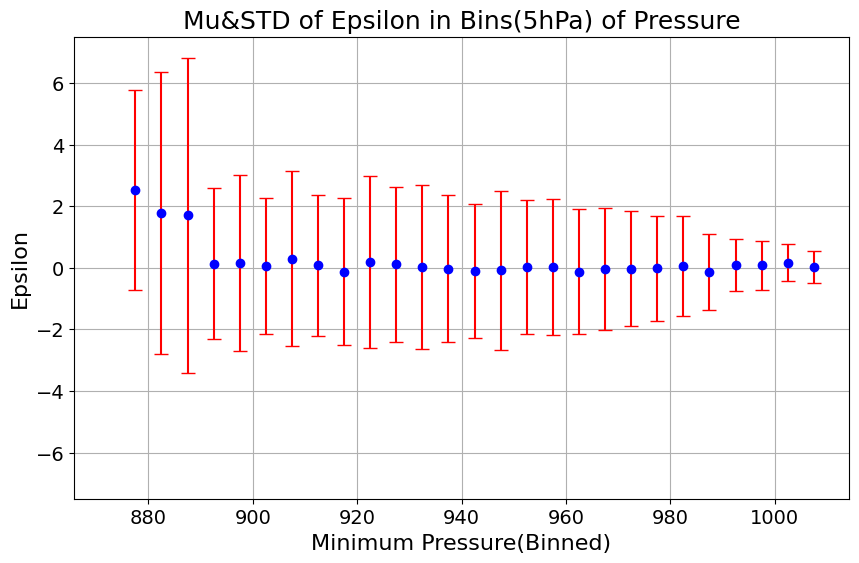

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# データを読み込む (ファイルパスは適宜変更してください)
data = pd.DataFrame({'Pressure': Pressurelist, 'Epsilon': Epsilonlist})

bin_step = 5

# 'Pres' をbin_step単位のビンに分割
bins = np.arange(870, data['Pressure'].max() + bin_step, bin_step)
data['bin'] = pd.cut(data['Pressure'], bins)

# 各ビンにおける 'Epsilon' の平均値と標準偏差を計算
grouped_data = data.groupby('bin')['Epsilon'].agg(['mean', 'std'])

# ビンの中央値を計算
grouped_data['bin_mid'] = grouped_data.index.map(lambda x: (x.left + x.right) / 2)

# エラーバー付きでプロット (平均値 ± 標準偏差)
x = grouped_data['bin_mid']
y = grouped_data['mean']
error = grouped_data['std']

plt.figure(figsize=(10, 6))
plt.errorbar(x, y, yerr=error, fmt='o', ecolor='red', color='blue', capsize=5)
plt.title('Mu&STD of Epsilon in Bins({}hPa) of Pressure'.format(bin_step), fontsize=18)
plt.xlabel('Minimum Pressure(Binned)', fontsize=16)
plt.ylabel('Epsilon', fontsize=16)
plt.tick_params(labelsize=14)
plt.ylim(-7.5, 7.5)
plt.grid(True)
plt.show()

[ 870.  880.  890.  900.  910.  920.  930.  940.  950.  960.  970.  980.
  990. 1000. 1010.]


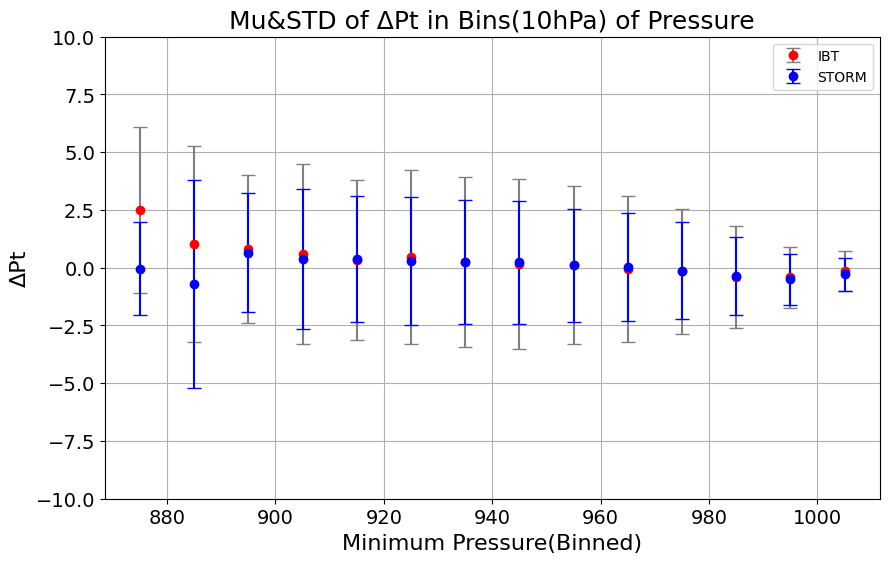

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# データを読み込む (ファイルパスは適宜変更してください)
data = pd.DataFrame({'Pressure': Pressurelist, 'IBT_deltaPt': IBT_deltaPt, 'STORM_deltaPt': STORM_deltaPt})

bin_step = 10

# 'Pres' をbin_step単位のビンに分割
bins = np.arange(870, data['Pressure'].max() + bin_step, bin_step)
print(bins)
data['bin'] = pd.cut(data['Pressure'], bins)

# 各ビンにおける 'Epsilon' の平均値と標準偏差を計算
grouped_data_ibt = data.groupby('bin')['IBT_deltaPt'].agg(['mean', 'std'])
grouped_data_st = data.groupby('bin')['STORM_deltaPt'].agg(['mean', 'std'])

# ビンの中央値を計算
grouped_data_ibt['bin_mid_ibt'] = grouped_data_ibt.index.map(lambda x: (x.left + x.right)/2)
grouped_data_st['bin_mid_st'] = grouped_data_st.index.map(lambda x: (x.left + x.right)/2)


# エラーバー付きでプロット (平均値 ± 標準偏差)
x_ibt = grouped_data_ibt['bin_mid_ibt']
x_st = grouped_data_st['bin_mid_st']
y_ibt = grouped_data_ibt['mean']
y_st = grouped_data_st['mean']
error_ibt = grouped_data_ibt['std']
error_st = grouped_data_st['std']

plt.figure(figsize=(10, 6))
plt.errorbar(x_ibt, y_ibt, yerr=error_ibt, fmt='o', ecolor='gray', color='red', capsize=5, label="IBT")
plt.errorbar(x_st, y_st, yerr=error_st, fmt='o', ecolor='blue', color='blue', capsize=5, label="STORM")
plt.title('Mu&STD of ΔPt in Bins({}hPa) of Pressure'.format(bin_step), fontsize=18)
plt.xlabel('Minimum Pressure(Binned)', fontsize=16)
plt.ylabel('ΔPt', fontsize=16)
plt.tick_params(labelsize=14)
plt.ylim(-10, 10)
plt.legend()
plt.grid(True)
plt.show()

[ 870.  880.  890.  900.  910.  920.  930.  940.  950.  960.  970.  980.
  990. 1000. 1010.]


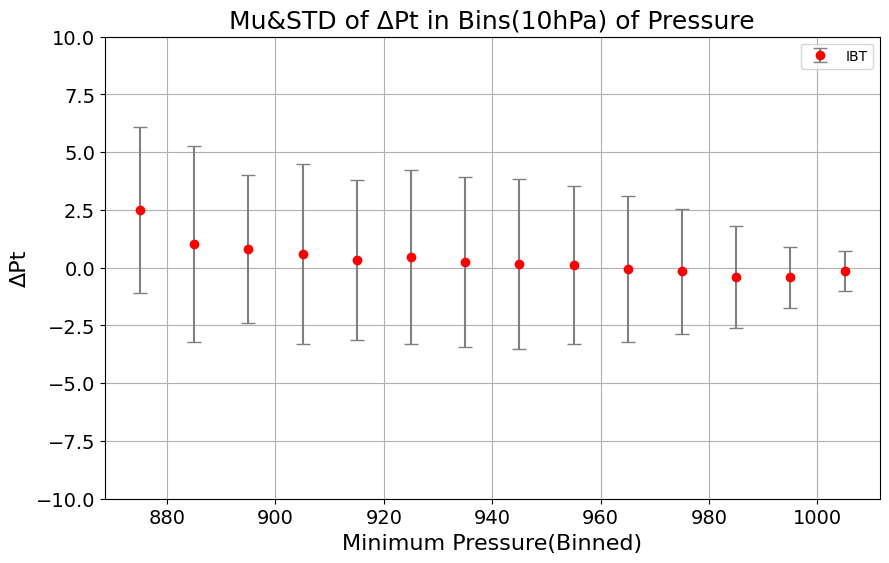

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# データを読み込む (ファイルパスは適宜変更してください)
data = pd.DataFrame({'Pressure': Pressurelist, 'IBT_deltaPt': IBT_deltaPt, 'STORM_deltaPt': STORM_deltaPt})

bin_step = 10

# 'Pres' をbin_step単位のビンに分割
bins = np.arange(870, data['Pressure'].max() + bin_step, bin_step)
print(bins)
data['bin'] = pd.cut(data['Pressure'], bins)

# 各ビンにおける 'Epsilon' の平均値と標準偏差を計算
grouped_data_ibt = data.groupby('bin')['IBT_deltaPt'].agg(['mean', 'std'])
grouped_data_st = data.groupby('bin')['STORM_deltaPt'].agg(['mean', 'std'])

# ビンの中央値を計算
grouped_data_ibt['bin_mid_ibt'] = grouped_data_ibt.index.map(lambda x: (x.left + x.right)/2)
grouped_data_st['bin_mid_st'] = grouped_data_st.index.map(lambda x: (x.left + x.right)/2)


# エラーバー付きでプロット (平均値 ± 標準偏差)
x_ibt = grouped_data_ibt['bin_mid_ibt']
x_st = grouped_data_st['bin_mid_st']
y_ibt = grouped_data_ibt['mean']
y_st = grouped_data_st['mean']
error_ibt = grouped_data_ibt['std']
error_st = grouped_data_st['std']

plt.figure(figsize=(10, 6))
plt.errorbar(x_ibt, y_ibt, yerr=error_ibt, fmt='o', ecolor='gray', color='red', capsize=5, label="IBT")
# plt.errorbar(x_st, y_st, yerr=error_st, fmt='o', ecolor='blue', color='blue', capsize=5, label="STORM")
plt.title('Mu&STD of ΔPt in Bins({}hPa) of Pressure'.format(bin_step), fontsize=18)
plt.xlabel('Minimum Pressure(Binned)', fontsize=16)
plt.ylabel('ΔPt', fontsize=16)
plt.tick_params(labelsize=14)
plt.ylim(-10, 10)
plt.legend()
plt.grid(True)
plt.show()

[ 870.  880.  890.  900.  910.  920.  930.  940.  950.  960.  970.  980.
  990. 1000. 1010.]


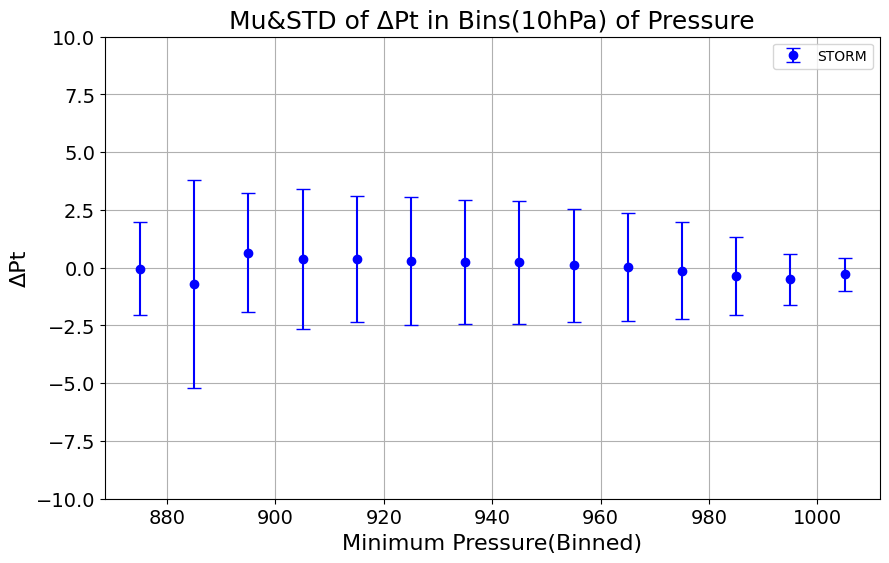

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# データを読み込む (ファイルパスは適宜変更してください)
data = pd.DataFrame({'Pressure': Pressurelist, 'IBT_deltaPt': IBT_deltaPt, 'STORM_deltaPt': STORM_deltaPt})

bin_step = 10

# 'Pres' をbin_step単位のビンに分割
bins = np.arange(870, data['Pressure'].max() + bin_step, bin_step)
print(bins)
data['bin'] = pd.cut(data['Pressure'], bins)

# 各ビンにおける 'Epsilon' の平均値と標準偏差を計算
grouped_data_ibt = data.groupby('bin')['IBT_deltaPt'].agg(['mean', 'std'])
grouped_data_st = data.groupby('bin')['STORM_deltaPt'].agg(['mean', 'std'])

# ビンの中央値を計算
grouped_data_ibt['bin_mid_ibt'] = grouped_data_ibt.index.map(lambda x: (x.left + x.right)/2)
grouped_data_st['bin_mid_st'] = grouped_data_st.index.map(lambda x: (x.left + x.right)/2)


# エラーバー付きでプロット (平均値 ± 標準偏差)
x_ibt = grouped_data_ibt['bin_mid_ibt']
x_st = grouped_data_st['bin_mid_st']
y_ibt = grouped_data_ibt['mean']
y_st = grouped_data_st['mean']
error_ibt = grouped_data_ibt['std']
error_st = grouped_data_st['std']

plt.figure(figsize=(10, 6))
# plt.errorbar(x_ibt, y_ibt, yerr=error_ibt, fmt='o', ecolor='gray', color='red', capsize=5, label="IBT")
plt.errorbar(x_st, y_st, yerr=error_st, fmt='o', ecolor='blue', color='blue', capsize=5, label="STORM")
plt.title('Mu&STD of ΔPt in Bins({}hPa) of Pressure'.format(bin_step), fontsize=18)
plt.xlabel('Minimum Pressure(Binned)', fontsize=16)
plt.ylabel('ΔPt', fontsize=16)
plt.tick_params(labelsize=14)
plt.ylim(-10, 10)
plt.legend()
plt.grid(True)
plt.show()

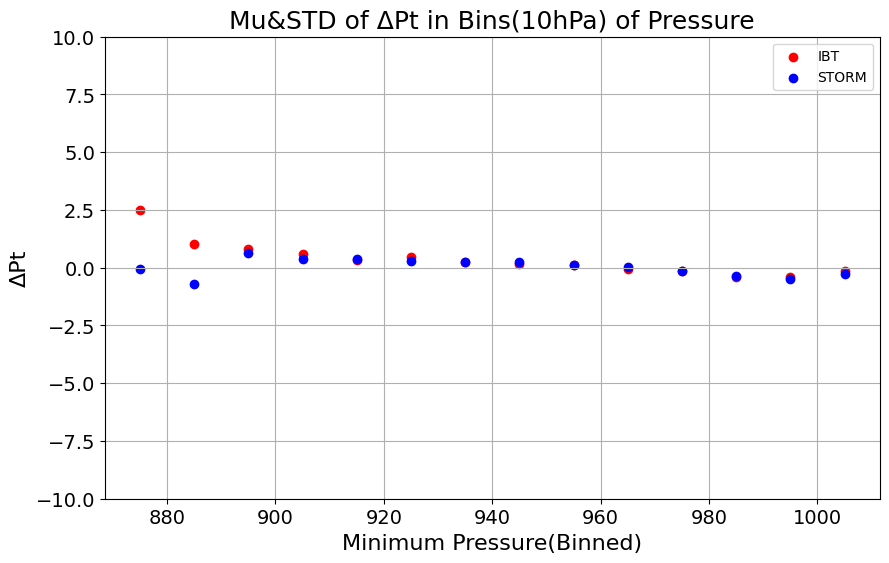

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# データを読み込む (ファイルパスは適宜変更してください)
data = pd.DataFrame({'Pressure': Pressurelist, 'IBT_deltaPt': IBT_deltaPt, 'STORM_deltaPt': STORM_deltaPt})

bin_step = 10

# 'Pres' をbin_step単位のビンに分割
bins = np.arange(870, data['Pressure'].max() + bin_step, bin_step)
data['bin'] = pd.cut(data['Pressure'], bins)

# 各ビンにおける 'Epsilon' の平均値と標準偏差を計算
grouped_data_ibt = data.groupby('bin')['IBT_deltaPt'].agg(['mean', 'std'])
grouped_data_st = data.groupby('bin')['STORM_deltaPt'].agg(['mean', 'std'])

# ビンの中央値を計算
grouped_data_ibt['bin_mid_ibt'] = grouped_data_ibt.index.map(lambda x: (x.left + x.right)/2)
grouped_data_st['bin_mid_st'] = grouped_data_st.index.map(lambda x: (x.left + x.right)/2)


# エラーバー付きでプロット (平均値 ± 標準偏差)
x_ibt = grouped_data_ibt['bin_mid_ibt']
x_st = grouped_data_st['bin_mid_st']
y_ibt = grouped_data_ibt['mean']
y_st = grouped_data_st['mean']
error_ibt = grouped_data_ibt['std']
error_st = grouped_data_st['std']

plt.figure(figsize=(10, 6))
plt.scatter(x_ibt, y_ibt, color='red',label="IBT")
plt.scatter(x_st, y_st, color='blue',label="STORM")
plt.title('Mu&STD of ΔPt in Bins({}hPa) of Pressure'.format(bin_step), fontsize=18)
plt.xlabel('Minimum Pressure(Binned)', fontsize=16)
plt.ylabel('ΔPt', fontsize=16)
plt.tick_params(labelsize=14)
plt.ylim(-10, 10)
plt.legend()
plt.grid(True)
plt.show()

96.83441558441558 %


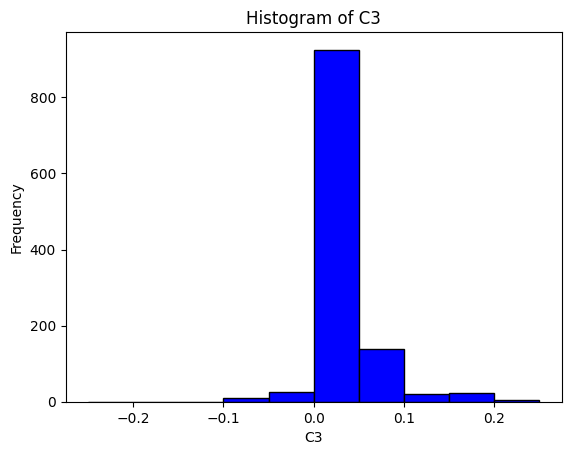

In [19]:
import matplotlib.pyplot as plt

# 現在のファイルのディレクトリパスを取得
current_dir = os.getcwd()
# input_data ディレクトリへの相対パスを作成
input_dir = os.path.join(current_dir, '..', 'output_data')

coeff = np.load(os.path.join(input_dir,'COEFFICIENTS_JM_PRESSURE.npy'), allow_pickle=True).item()

# WPのデータを抽出
WP_IDX = 5

coeff = coeff[WP_IDX]
c3 = []
for month in range(5, 12):
    for grid in coeff[month]:
        c3.append(grid[3])

positive_c3 = [x for x in c3 if x >= 0]
print(len(positive_c3)*100 / len(c3), "%")
plt.hist(c3, bins=10, range=(-0.25, 0.25), color='blue', edgecolor='black')

plt.title('Histogram of C3')
plt.xlabel('C3')
plt.ylabel('Frequency')
plt.show()


[111.75512878040273, 111.75512878040273, 111.75512878040273, 15.980344863957493, 4830155137.245186, 4830155137.245186, 5518571800.565729, 5518571800.565729, 9.435135286429936, 2.1248633027947776, 2.1248633027947776, 1.7126200558806712, 1.910471892017291, 1.910471892017291, 664.0556471814781, 664.0556471814781, 111.75512878040273, 111.75512878040273, 111.75512878040273, 15.980344863957493, 15.980344863957493, 1.777674509887427, 1.777674509887427, 2.9127029106056406, 5.3718039907532, 5.3718039907532, 1.4683371695525052, 1.4683371695525052, 1.4683371695525052, 664.0556471814781, 664.0556471814781, 664.0556471814781, 111.75512878040273, 111.75512878040273, 3.284861144365077, 3.284861144365077, 3.284861144365077, 1.8577511946024174, 1.8577511946024174, 2.8794047201111455, 4.1782818206157435, 1.5151515371428022, 1.5151515371428022, 1.5151515371428022, 1.6361690686893182, 1.6361690686893182, 664.0556471814781, 664.0556471814781, 111.75512878040273, 3.2030874533245846, 3.2030874533245846, 3.20

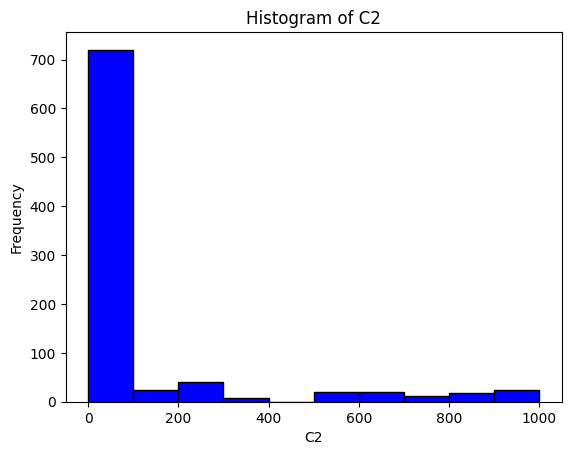

In [25]:
import matplotlib.pyplot as plt

# 現在のファイルのディレクトリパスを取得
current_dir = os.getcwd()
# input_data ディレクトリへの相対パスを作成
input_dir = os.path.join(current_dir, '..', 'output_data')

coeff = np.load(os.path.join(input_dir,'COEFFICIENTS_JM_PRESSURE.npy'), allow_pickle=True).item()

# WPのデータを抽出
WP_IDX = 5

coeff = coeff[WP_IDX]
c2 = []
for month in range(5, 12):
    for grid in coeff[month]:
        c2.append(grid[2])

print(c2)

positive_c2 = [x for x in c2 if x >= 0]
print(len(positive_c2)*100 / len(c2), "%")
plt.hist(c2, bins=10, range=(0, 1000), color='blue', edgecolor='black')

plt.title('Histogram of C2')
plt.xlabel('C2')
plt.ylabel('Frequency')
plt.show()


[111.75512878040273, 111.75512878040273, 111.75512878040273, 15.980344863957493, 4830155137.245186, 4830155137.245186, 5518571800.565729, 5518571800.565729, 9.435135286429936, 2.1248633027947776, 2.1248633027947776, 1.7126200558806712, 1.910471892017291, 1.910471892017291, 664.0556471814781, 664.0556471814781, 111.75512878040273, 111.75512878040273, 111.75512878040273, 15.980344863957493, 15.980344863957493, 1.777674509887427, 1.777674509887427, 2.9127029106056406, 5.3718039907532, 5.3718039907532, 1.4683371695525052, 1.4683371695525052, 1.4683371695525052, 664.0556471814781, 664.0556471814781, 664.0556471814781, 111.75512878040273, 111.75512878040273, 3.284861144365077, 3.284861144365077, 3.284861144365077, 1.8577511946024174, 1.8577511946024174, 2.8794047201111455, 4.1782818206157435, 1.5151515371428022, 1.5151515371428022, 1.5151515371428022, 1.6361690686893182, 1.6361690686893182, 664.0556471814781, 664.0556471814781, 111.75512878040273, 3.2030874533245846, 3.2030874533245846, 3.20

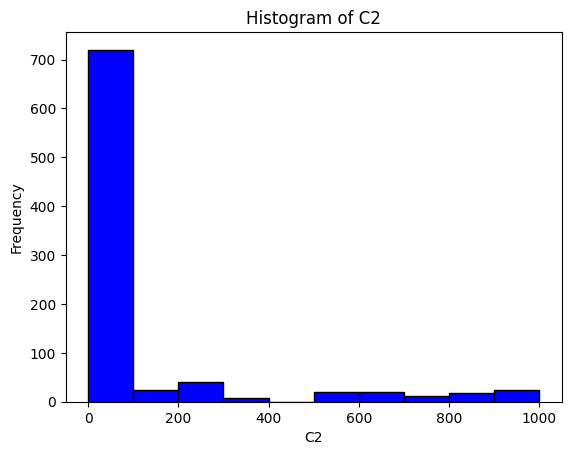

In [52]:
import matplotlib.pyplot as plt

# 現在のファイルのディレクトリパスを取得
current_dir = os.getcwd()
# input_data ディレクトリへの相対パスを作成
input_dir = os.path.join(current_dir, '..', 'output_data')

coeff = np.load(os.path.join(input_dir,'COEFFICIENTS_JM_PRESSURE.npy'), allow_pickle=True).item()

# WPのデータを抽出
WP_IDX = 5

coeff = coeff[WP_IDX]
c1 = []
for month in range(5, 12):
    for grid in coeff[month]:
        c1.append(grid[2])

print(c1)

positive_c1 = [x for x in c1 if x >= 0]
print(len(positive_c1)*100 / len(c1), "%")
plt.hist(c1, bins=10, range=(0, 1000), color='blue', edgecolor='black')

plt.title('Histogram of C2')
plt.xlabel('C2')
plt.ylabel('Frequency')
plt.show()


[0.7780016946264001, 0.7780016946264001, 0.7780016946264001, 0.7335488640293637, 0.7579366321143889, 0.7579366321143889, 0.7572623845114038, 0.7572623845114038, 0.6288075858639873, 0.600312025619652, 0.600312025619652, 0.77747892187591, 0.849405545722314, 0.849405545722314, 0.8453527294500763, 0.8453527294500763, 0.7780016946264001, 0.7780016946264001, 0.7780016946264001, 0.7335488640293637, 0.7335488640293637, 0.7942287476893863, 0.7942287476893863, 0.7566353272843689, 0.6682543639132469, 0.6682543639132469, 0.7859167920013983, 0.7859167920013983, 0.7859167920013983, 0.8453527294500763, 0.8453527294500763, 0.8453527294500763, 0.7780016946264001, 0.7780016946264001, 0.7398584169556623, 0.7398584169556623, 0.7398584169556623, 0.7711475540244737, 0.7711475540244737, 0.6995860960303799, 0.6525927641774871, 0.7496355688959557, 0.7496355688959557, 0.7496355688959557, 0.8635098950115436, 0.8635098950115436, 0.8453527294500763, 0.8453527294500763, 0.7780016946264001, 0.7065558952611755, 0.706

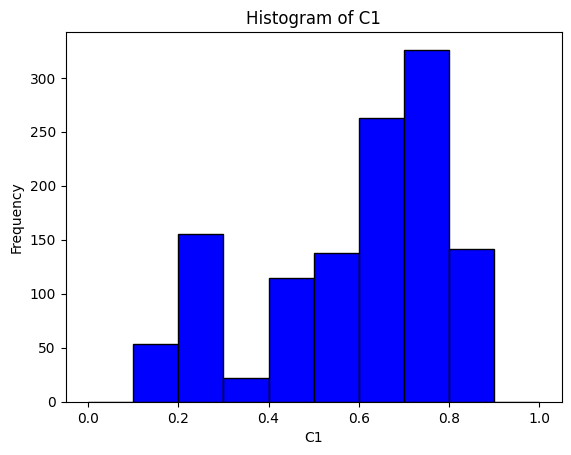

In [27]:
import matplotlib.pyplot as plt

# 現在のファイルのディレクトリパスを取得
current_dir = os.getcwd()
# input_data ディレクトリへの相対パスを作成
input_dir = os.path.join(current_dir, '..', 'output_data')

coeff = np.load(os.path.join(input_dir,'COEFFICIENTS_JM_PRESSURE.npy'), allow_pickle=True).item()

# WPのデータを抽出
WP_IDX = 5

coeff = coeff[WP_IDX]
c1 = []
for month in range(5, 12):
    for grid in coeff[month]:
        c1.append(grid[1])

print(c1)

positive_c1 = [x for x in c1 if x >= 0]
print(len(positive_c1)*100 / len(c1), "%")
plt.hist(c1, bins=10, range=(0, 1), color='blue', edgecolor='black')

plt.title('Histogram of C1')
plt.xlabel('C1')
plt.ylabel('Frequency')
plt.show()


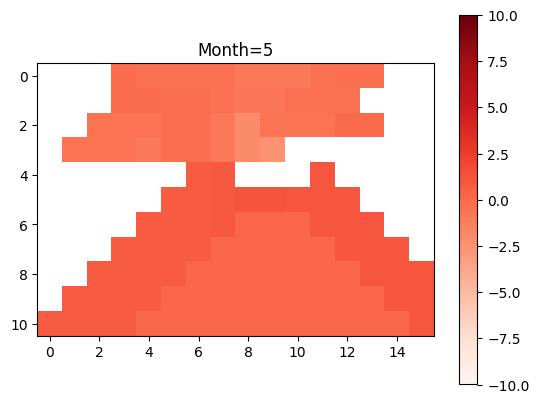

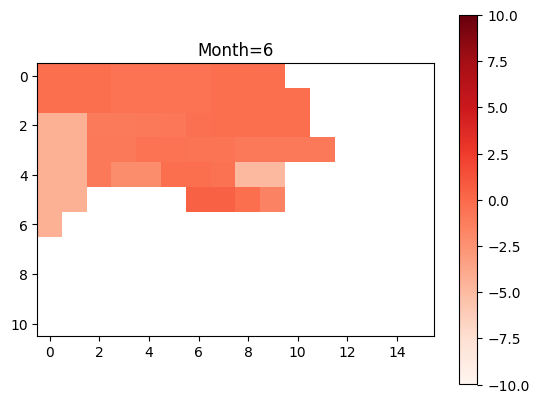

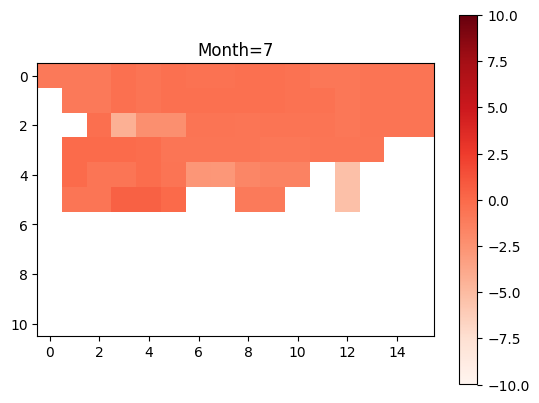

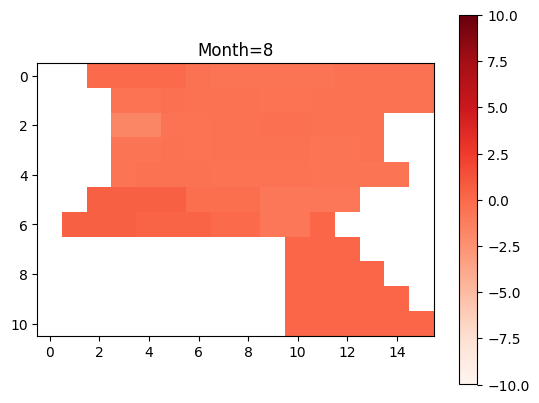

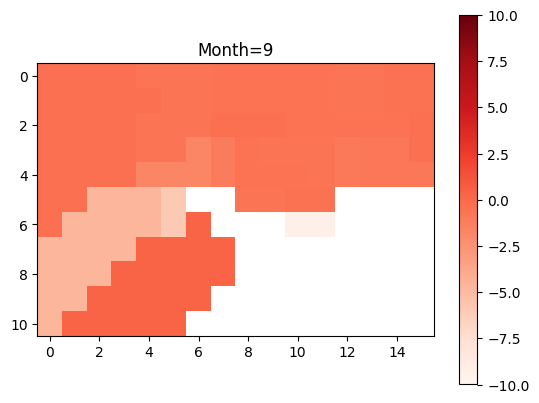

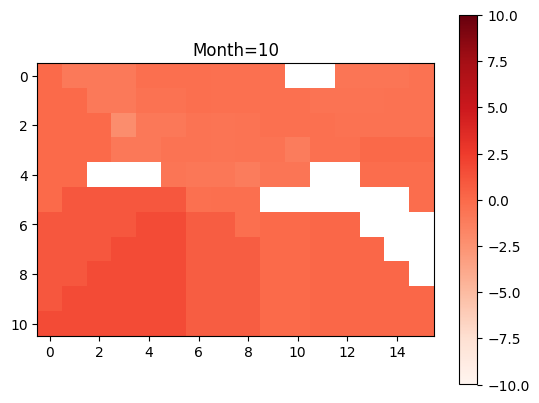

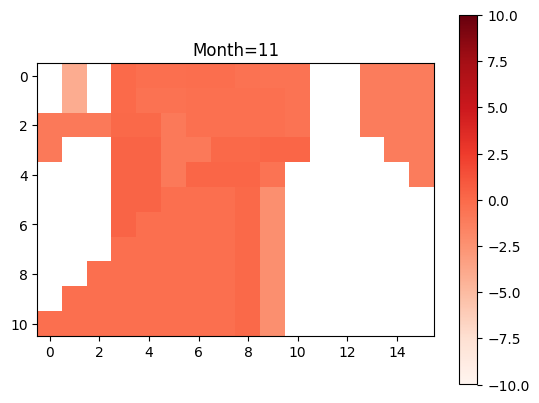

12.5 %


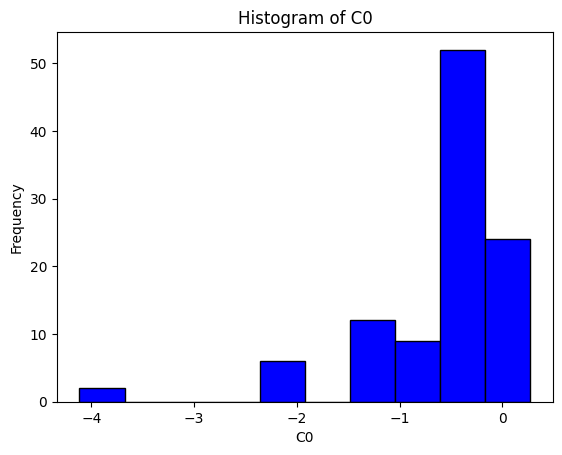

In [64]:
import matplotlib.pyplot as plt

# 現在のファイルのディレクトリパスを取得
current_dir = os.getcwd()
# input_data ディレクトリへの相対パスを作成
input_dir = os.path.join(current_dir, '..', 'output_data')

coeff = np.load(os.path.join(input_dir,'COEFFICIENTS_JM_PRESSURE.npy'), allow_pickle=True).item()

# WPのデータを抽出
WP_IDX = 5

coeff = coeff[WP_IDX]
for month in range(5, 12):
    c0 = []
    for grid in coeff[month]:
        if grid[0] < -10:
            c0.append(np.nan)
        else:
            c0.append(grid[0])
    array_c0 = np.array(c0)
    array_c0 = array_c0.reshape(11, 16)
    plt.imshow(array_c0, cmap='Reds', vmin=-10, vmax=10)
    plt.colorbar()
    plt.title('Month={}'.format(month))
    plt.show()

positive_c0 = [x for x in c0 if x >= 0]
print(len(positive_c0)*100 / len(c0), "%")
plt.hist(c0, bins=10, color='blue', edgecolor='black')

plt.title('Histogram of C0')
plt.xlabel('C0')
plt.ylabel('Frequency')
plt.show()

In [77]:
import matplotlib.pyplot as plt

# 現在のファイルのディレクトリパスを取得
current_dir = os.getcwd()
# input_data ディレクトリへの相対パスを作成
input_dir = os.path.join(current_dir, '..', 'output_data')

coeff = np.load(os.path.join(input_dir,'COEFFICIENTS_JM_PRESSURE.npy'), allow_pickle=True).item()

# WPのデータを抽出
WP_IDX = 5

coeff = coeff[WP_IDX]

c2 = coeff[8][156][2]
c3 = coeff[8][156][3]
mpi = coeff[8][156][6]
print(c2, c3, mpi)

2.8562014654009986 0.3252285178942489 969.8255686967851


In [ ]:
Pt = np.linspace(850, )

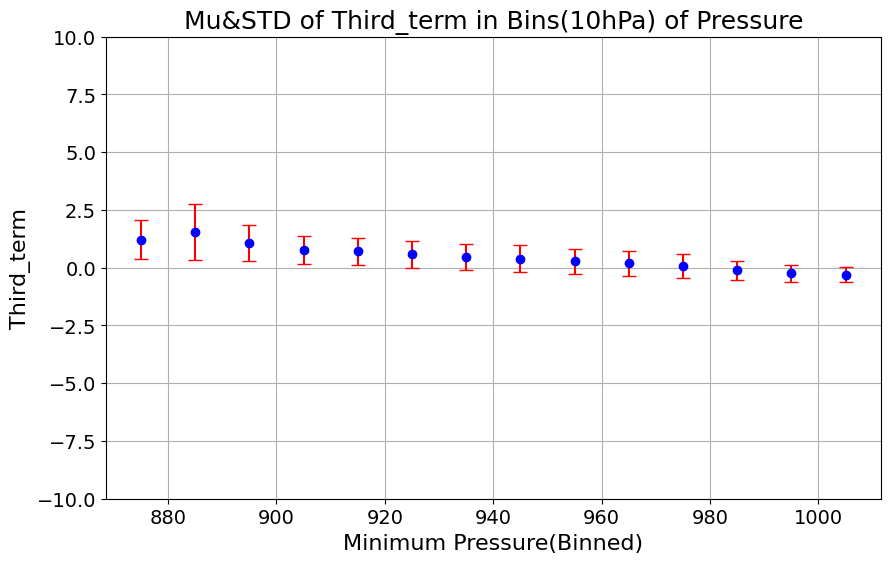

In [39]:
# 第3項の値
###  データのロード

import numpy as np
import os

# 現在のファイルのディレクトリパスを取得
current_dir = os.getcwd()
# input_data ディレクトリへの相対パスを作成
input_dir = os.path.join(current_dir, '..', 'output_data')

First_term = np.load(os.path.join(input_dir,'First_term.npy'), allow_pickle=True).item()
Second_term = np.load(os.path.join(input_dir,'Second_term.npy'), allow_pickle=True).item()
Third_term = np.load(os.path.join(input_dir,'Third_term.npy'), allow_pickle=True).item()


# WPのデータを抽出
WP_IDX = 5

First_term = First_term[WP_IDX]
Second_term = Second_term[WP_IDX]
Third_term = Third_term[WP_IDX]

delta_p = [x + y + z for x, y, z in zip(First_term, Second_term, Third_term)]

first_third = [x + y for x, y in zip(First_term, Third_term)]

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# データを読み込む (ファイルパスは適宜変更してください)
data = pd.DataFrame({'Pressure': Pressurelist, 'First_term': First_term, 'Second_term': Second_term, 'Third_term': Third_term, 'delta_p': delta_p, 'first_third': first_third})

bin_step = 10

# 'Pres' をbin_step単位のビンに分割
bins = np.arange(870, data['Pressure'].max() + bin_step, bin_step)
data['bin'] = pd.cut(data['Pressure'], bins)

# 各ビンにおける 'Epsilon' の平均値と標準偏差を計算
grouped_data = data.groupby('bin')['first_third'].agg(['mean', 'std'])

# ビンの中央値を計算
grouped_data['bin_mid'] = grouped_data.index.map(lambda x: (x.left + x.right) / 2)

# エラーバー付きでプロット (平均値 ± 標準偏差)
x = grouped_data['bin_mid']
y = grouped_data['mean']
error = grouped_data['std']

plt.figure(figsize=(10, 6))
plt.errorbar(x, y, yerr=error, fmt='o', ecolor='red', color='blue', capsize=5)
plt.title('Mu&STD of Third_term in Bins({}hPa) of Pressure'.format(bin_step), fontsize=18)
plt.xlabel('Minimum Pressure(Binned)', fontsize=16)
plt.ylabel('Third_term', fontsize=16)
plt.tick_params(labelsize=14)
plt.ylim(-10, 10)
plt.grid(True)
plt.show()

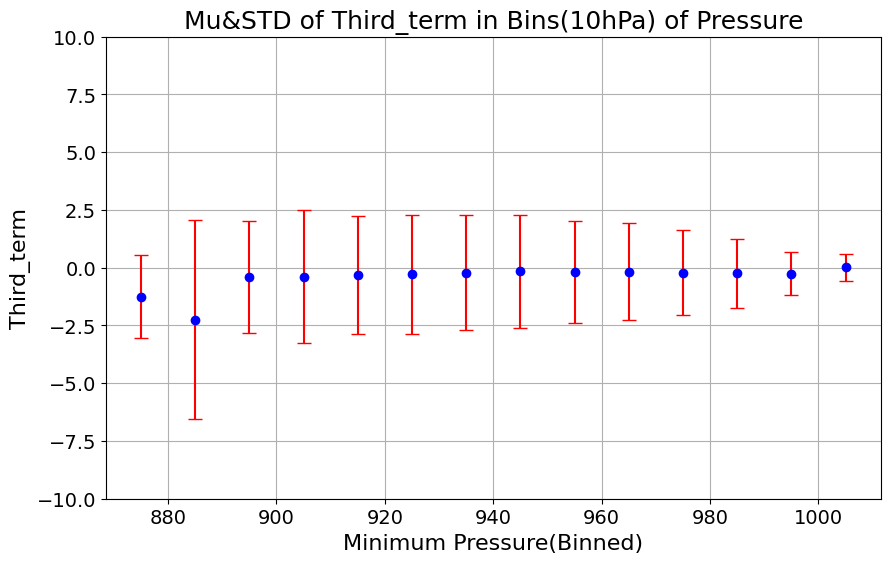

In [40]:
# 第3項の値
###  データのロード

import numpy as np
import os

# 現在のファイルのディレクトリパスを取得
current_dir = os.getcwd()
# input_data ディレクトリへの相対パスを作成
input_dir = os.path.join(current_dir, '..', 'output_data')

First_term = np.load(os.path.join(input_dir,'First_term.npy'), allow_pickle=True).item()
Second_term = np.load(os.path.join(input_dir,'Second_term.npy'), allow_pickle=True).item()
Third_term = np.load(os.path.join(input_dir,'Third_term.npy'), allow_pickle=True).item()


# WPのデータを抽出
WP_IDX = 5

First_term = First_term[WP_IDX]
Second_term = Second_term[WP_IDX]
Third_term = Third_term[WP_IDX]

delta_p = [x + y + z for x, y, z in zip(First_term, Second_term, Third_term)]

first_third = [x + y for x, y in zip(First_term, Third_term)]

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# データを読み込む (ファイルパスは適宜変更してください)
data = pd.DataFrame({'Pressure': Pressurelist, 'First_term': First_term, 'Second_term': Second_term, 'Third_term': Third_term, 'delta_p': delta_p, 'first_third': first_third})

bin_step = 10

# 'Pres' をbin_step単位のビンに分割
bins = np.arange(870, data['Pressure'].max() + bin_step, bin_step)
data['bin'] = pd.cut(data['Pressure'], bins)

# 各ビンにおける 'Epsilon' の平均値と標準偏差を計算
grouped_data = data.groupby('bin')['Second_term'].agg(['mean', 'std'])

# ビンの中央値を計算
grouped_data['bin_mid'] = grouped_data.index.map(lambda x: (x.left + x.right) / 2)

# エラーバー付きでプロット (平均値 ± 標準偏差)
x = grouped_data['bin_mid']
y = grouped_data['mean']
error = grouped_data['std']

plt.figure(figsize=(10, 6))
plt.errorbar(x, y, yerr=error, fmt='o', ecolor='red', color='blue', capsize=5)
plt.title('Mu&STD of Third_term in Bins({}hPa) of Pressure'.format(bin_step), fontsize=18)
plt.xlabel('Minimum Pressure(Binned)', fontsize=16)
plt.ylabel('Third_term', fontsize=16)
plt.tick_params(labelsize=14)
plt.ylim(-10, 10)
plt.grid(True)
plt.show()

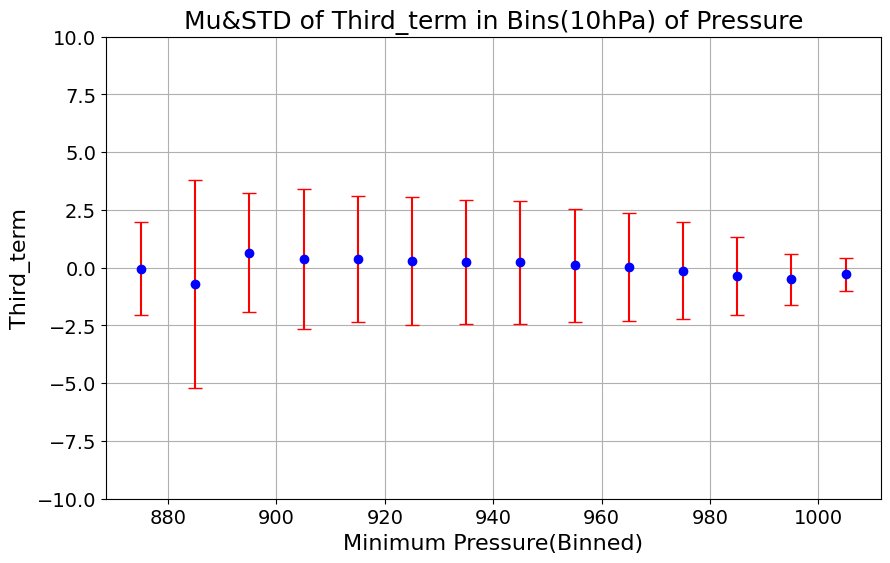

In [41]:
# 第3項の値
###  データのロード

import numpy as np
import os

# 現在のファイルのディレクトリパスを取得
current_dir = os.getcwd()
# input_data ディレクトリへの相対パスを作成
input_dir = os.path.join(current_dir, '..', 'output_data')

First_term = np.load(os.path.join(input_dir,'First_term.npy'), allow_pickle=True).item()
Second_term = np.load(os.path.join(input_dir,'Second_term.npy'), allow_pickle=True).item()
Third_term = np.load(os.path.join(input_dir,'Third_term.npy'), allow_pickle=True).item()


# WPのデータを抽出
WP_IDX = 5

First_term = First_term[WP_IDX]
Second_term = Second_term[WP_IDX]
Third_term = Third_term[WP_IDX]

delta_p = [x + y + z for x, y, z in zip(First_term, Second_term, Third_term)]

first_third = [x + y for x, y in zip(First_term, Third_term)]

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# データを読み込む (ファイルパスは適宜変更してください)
data = pd.DataFrame({'Pressure': Pressurelist, 'First_term': First_term, 'Second_term': Second_term, 'Third_term': Third_term, 'delta_p': delta_p, 'first_third': first_third})

bin_step = 10

# 'Pres' をbin_step単位のビンに分割
bins = np.arange(870, data['Pressure'].max() + bin_step, bin_step)
data['bin'] = pd.cut(data['Pressure'], bins)

# 各ビンにおける 'Epsilon' の平均値と標準偏差を計算
grouped_data = data.groupby('bin')['delta_p'].agg(['mean', 'std'])

# ビンの中央値を計算
grouped_data['bin_mid'] = grouped_data.index.map(lambda x: (x.left + x.right) / 2)

# エラーバー付きでプロット (平均値 ± 標準偏差)
x = grouped_data['bin_mid']
y = grouped_data['mean']
error = grouped_data['std']

plt.figure(figsize=(10, 6))
plt.errorbar(x, y, yerr=error, fmt='o', ecolor='red', color='blue', capsize=5)
plt.title('Mu&STD of Third_term in Bins({}hPa) of Pressure'.format(bin_step), fontsize=18)
plt.xlabel('Minimum Pressure(Binned)', fontsize=16)
plt.ylabel('Third_term', fontsize=16)
plt.tick_params(labelsize=14)
plt.ylim(-10, 10)
plt.grid(True)
plt.show()

1550.051659657988


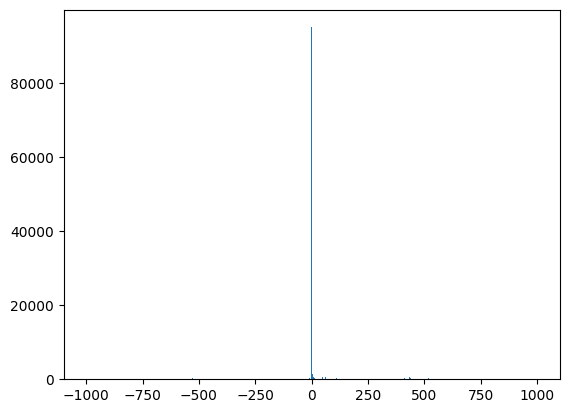

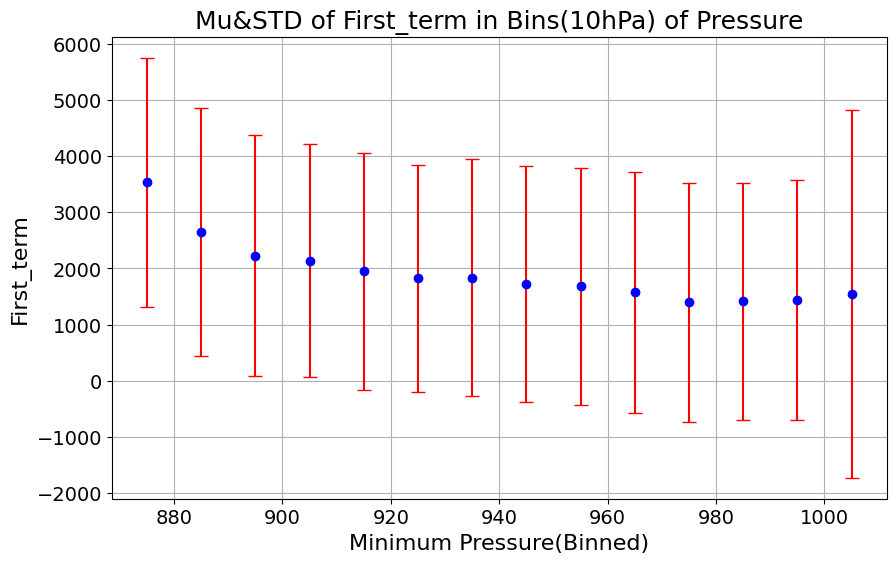

In [55]:
# 第3項の値
###  データのロード

import numpy as np
import os

# 現在のファイルのディレクトリパスを取得
current_dir = os.getcwd()
# input_data ディレクトリへの相対パスを作成
input_dir = os.path.join(current_dir, '..', 'output_data')

First_term = np.load(os.path.join(input_dir,'First_term.npy'), allow_pickle=True).item()
Second_term = np.load(os.path.join(input_dir,'Second_term.npy'), allow_pickle=True).item()
Third_term = np.load(os.path.join(input_dir,'Third_term.npy'), allow_pickle=True).item()


# WPのデータを抽出
WP_IDX = 5

First_term = First_term[WP_IDX]
print(np.mean(First_term))
Second_term = Second_term[WP_IDX]
Third_term = Third_term[WP_IDX]

delta_p = [x + y + z for x, y, z in zip(First_term, Second_term, Third_term)]

first_third = [x + y for x, y in zip(First_term, Third_term)]

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# データを読み込む (ファイルパスは適宜変更してください)
data = pd.DataFrame({'Pressure': Pressurelist, 'First_term': First_term, 'Second_term': Second_term, 'Third_term': Third_term, 'delta_p': delta_p, 'first_third': first_third})

bin_step = 10

# 'Pres' をbin_step単位のビンに分割
bins = np.arange(870, data['Pressure'].max() + bin_step, bin_step)
data['bin'] = pd.cut(data['Pressure'], bins)

# 各ビンにおける 'Epsilon' の平均値と標準偏差を計算
grouped_data = data.groupby('bin')['First_term'].agg(['mean', 'std'])

# ビンの中央値を計算
grouped_data['bin_mid'] = grouped_data.index.map(lambda x: (x.left + x.right) / 2)

# エラーバー付きでプロット (平均値 ± 標準偏差)
x = grouped_data['bin_mid']
y = grouped_data['mean']
error = grouped_data['std']

plt.hist(data['First_term'], range(-1000, 1000))
plt.show()
plt.figure(figsize=(10, 6))
plt.errorbar(x, y, yerr=error, fmt='o', ecolor='red', color='blue', capsize=5)
plt.title('Mu&STD of First_term in Bins({}hPa) of Pressure'.format(bin_step), fontsize=18)
plt.xlabel('Minimum Pressure(Binned)', fontsize=16)
plt.ylabel('First_term', fontsize=16)
plt.tick_params(labelsize=14)
# plt.ylim(-10, 10)
plt.grid(True)
plt.show()

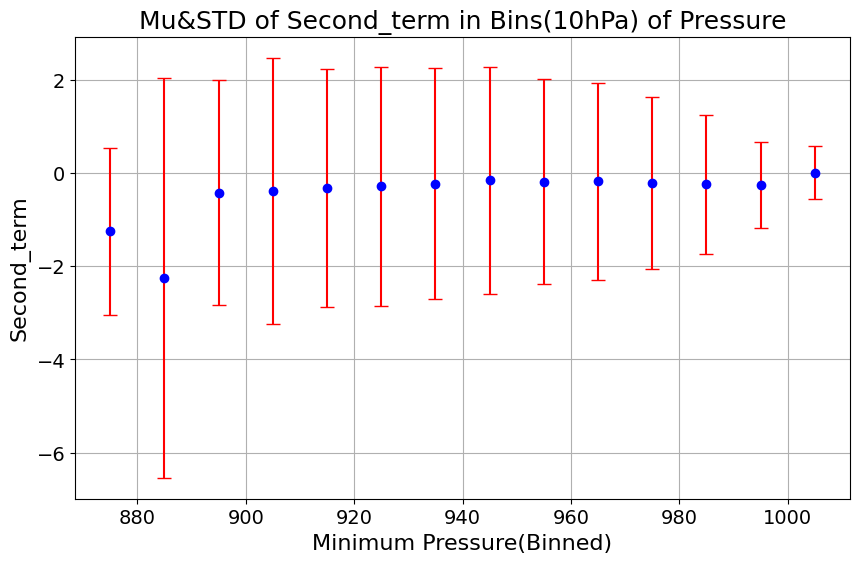

In [48]:
# 第3項の値
###  データのロード

import numpy as np
import os

# 現在のファイルのディレクトリパスを取得
current_dir = os.getcwd()
# input_data ディレクトリへの相対パスを作成
input_dir = os.path.join(current_dir, '..', 'output_data')

First_term = np.load(os.path.join(input_dir,'First_term.npy'), allow_pickle=True).item()
Second_term = np.load(os.path.join(input_dir,'Second_term.npy'), allow_pickle=True).item()
Third_term = np.load(os.path.join(input_dir,'Third_term.npy'), allow_pickle=True).item()


# WPのデータを抽出
WP_IDX = 5

First_term = First_term[WP_IDX]
Second_term = Second_term[WP_IDX]
Third_term = Third_term[WP_IDX]

delta_p = [x + y + z for x, y, z in zip(First_term, Second_term, Third_term)]

first_third = [x + y for x, y in zip(First_term, Third_term)]

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# データを読み込む (ファイルパスは適宜変更してください)
data = pd.DataFrame({'Pressure': Pressurelist, 'First_term': First_term, 'Second_term': Second_term, 'Third_term': Third_term, 'delta_p': delta_p, 'first_third': first_third})

bin_step = 10

# 'Pres' をbin_step単位のビンに分割
bins = np.arange(870, data['Pressure'].max() + bin_step, bin_step)
data['bin'] = pd.cut(data['Pressure'], bins)

# 各ビンにおける 'Epsilon' の平均値と標準偏差を計算
grouped_data = data.groupby('bin')['Second_term'].agg(['mean', 'std'])

# ビンの中央値を計算
grouped_data['bin_mid'] = grouped_data.index.map(lambda x: (x.left + x.right) / 2)

# エラーバー付きでプロット (平均値 ± 標準偏差)
x = grouped_data['bin_mid']
y = grouped_data['mean']
error = grouped_data['std']

plt.figure(figsize=(10, 6))
plt.errorbar(x, y, yerr=error, fmt='o', ecolor='red', color='blue', capsize=5)
plt.title('Mu&STD of Second_term in Bins({}hPa) of Pressure'.format(bin_step), fontsize=18)
plt.xlabel('Minimum Pressure(Binned)', fontsize=16)
plt.ylabel('Second_term', fontsize=16)
plt.tick_params(labelsize=14)
# plt.ylim(-10, 10)
plt.grid(True)
plt.show()

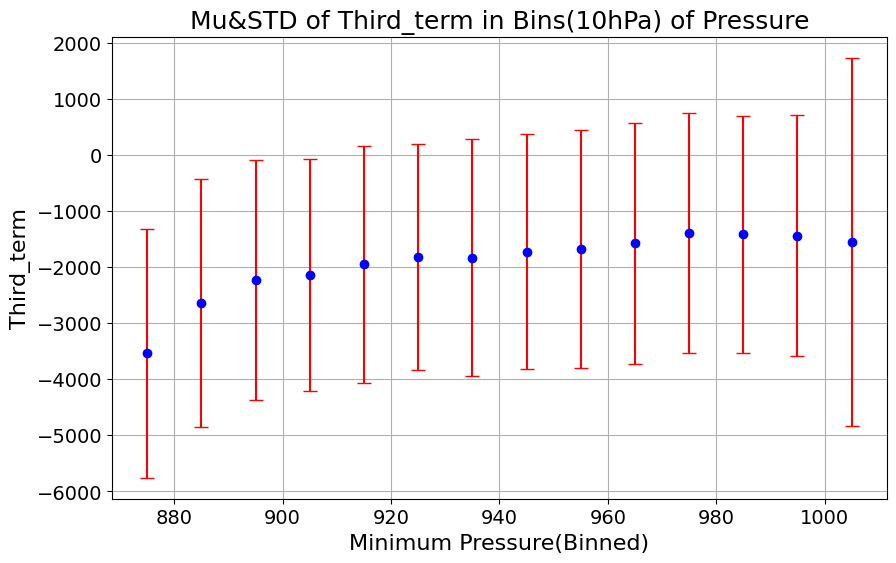

In [50]:
# 第3項の値
###  データのロード

import numpy as np
import os

# 現在のファイルのディレクトリパスを取得
current_dir = os.getcwd()
# input_data ディレクトリへの相対パスを作成
input_dir = os.path.join(current_dir, '..', 'output_data')

First_term = np.load(os.path.join(input_dir,'First_term.npy'), allow_pickle=True).item()
Second_term = np.load(os.path.join(input_dir,'Second_term.npy'), allow_pickle=True).item()
Third_term = np.load(os.path.join(input_dir,'Third_term.npy'), allow_pickle=True).item()


# WPのデータを抽出
WP_IDX = 5

First_term = First_term[WP_IDX]
Second_term = Second_term[WP_IDX]
Third_term = Third_term[WP_IDX]

delta_p = [x + y + z for x, y, z in zip(First_term, Second_term, Third_term)]

first_third = [x + y for x, y in zip(First_term, Third_term)]

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# データを読み込む (ファイルパスは適宜変更してください)
data = pd.DataFrame({'Pressure': Pressurelist, 'First_term': First_term, 'Second_term': Second_term, 'Third_term': Third_term, 'delta_p': delta_p, 'first_third': first_third})

bin_step = 10

# 'Pres' をbin_step単位のビンに分割
bins = np.arange(870, data['Pressure'].max() + bin_step, bin_step)
data['bin'] = pd.cut(data['Pressure'], bins)

# 各ビンにおける 'Epsilon' の平均値と標準偏差を計算
grouped_data = data.groupby('bin')['Third_term'].agg(['mean', 'std'])

# ビンの中央値を計算
grouped_data['bin_mid'] = grouped_data.index.map(lambda x: (x.left + x.right) / 2)

# エラーバー付きでプロット (平均値 ± 標準偏差)
x = grouped_data['bin_mid']
y = grouped_data['mean']
error = grouped_data['std']

plt.figure(figsize=(10, 6))
plt.errorbar(x, y, yerr=error, fmt='o', ecolor='red', color='blue', capsize=5)
plt.title('Mu&STD of Third_term in Bins({}hPa) of Pressure'.format(bin_step), fontsize=18)
plt.xlabel('Minimum Pressure(Binned)', fontsize=16)
plt.ylabel('Third_term', fontsize=16)
plt.tick_params(labelsize=14)
# plt.ylim(-10, 10)
plt.grid(True)
plt.show()

1550.051659657988


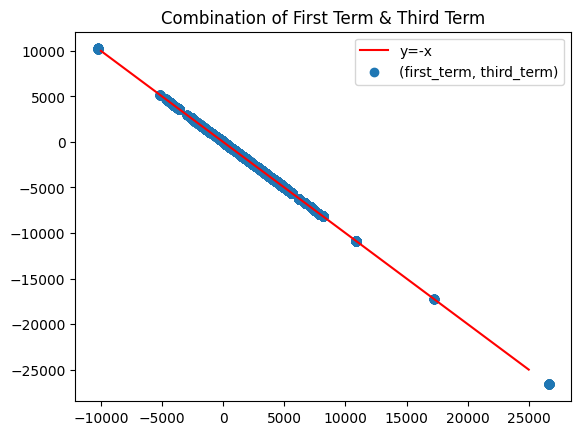

In [70]:
# 第3項の値
###  データのロード

import numpy as np
import os

# 現在のファイルのディレクトリパスを取得
current_dir = os.getcwd()
# input_data ディレクトリへの相対パスを作成
input_dir = os.path.join(current_dir, '..', 'output_data')

First_term = np.load(os.path.join(input_dir,'First_term.npy'), allow_pickle=True).item()
Second_term = np.load(os.path.join(input_dir,'Second_term.npy'), allow_pickle=True).item()
Third_term = np.load(os.path.join(input_dir,'Third_term.npy'), allow_pickle=True).item()


# WPのデータを抽出
WP_IDX = 5

First_term = First_term[WP_IDX]
print(np.mean(First_term))
Second_term = Second_term[WP_IDX]
Third_term = Third_term[WP_IDX]

delta_p = [x + y + z for x, y, z in zip(First_term, Second_term, Third_term)]

first_third = [x + y for x, y in zip(First_term, Third_term)]

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# データを読み込む (ファイルパスは適宜変更してください)
data = pd.DataFrame({'Pressure': Pressurelist, 'First_term': First_term, 'Second_term': Second_term, 'Third_term': Third_term, 'delta_p': delta_p, 'first_third': first_third})


# xの値を生成
x = np.linspace(-10000, 25000, 10)  # -10から10までの100個の値

# y = -x の計算
y = -x
plt.plot(x, y, c="r", label="y=-x")
plt.scatter(data["First_term"], data["Third_term"], label="(first_term, third_term)")
plt.legend()
plt.title("Combination of First Term & Third Term")
plt.show()

1550.051659657988


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


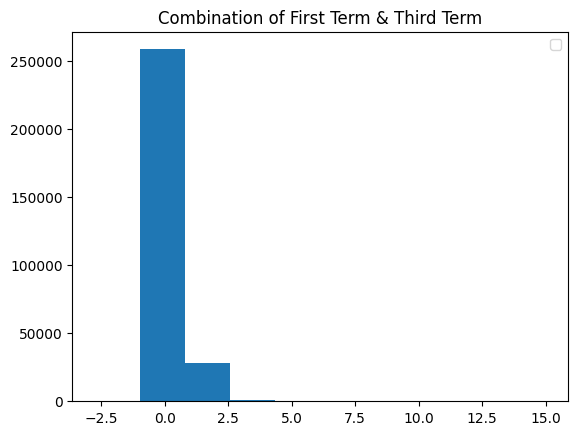

In [71]:
# 第3項の値
###  データのロード

import numpy as np
import os

# 現在のファイルのディレクトリパスを取得
current_dir = os.getcwd()
# input_data ディレクトリへの相対パスを作成
input_dir = os.path.join(current_dir, '..', 'output_data')

First_term = np.load(os.path.join(input_dir,'First_term.npy'), allow_pickle=True).item()
Second_term = np.load(os.path.join(input_dir,'Second_term.npy'), allow_pickle=True).item()
Third_term = np.load(os.path.join(input_dir,'Third_term.npy'), allow_pickle=True).item()


# WPのデータを抽出
WP_IDX = 5

First_term = First_term[WP_IDX]
print(np.mean(First_term))
Second_term = Second_term[WP_IDX]
Third_term = Third_term[WP_IDX]

delta_p = [x + y + z for x, y, z in zip(First_term, Second_term, Third_term)]

first_third = [x + y for x, y in zip(First_term, Third_term)]

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# データを読み込む (ファイルパスは適宜変更してください)
data = pd.DataFrame({'Pressure': Pressurelist, 'First_term': First_term, 'Second_term': Second_term, 'Third_term': Third_term, 'delta_p': delta_p, 'first_third': first_third})
plt.hist(data["first_third"])
plt.legend()
plt.title("Combination of First Term & Third Term")
plt.show()

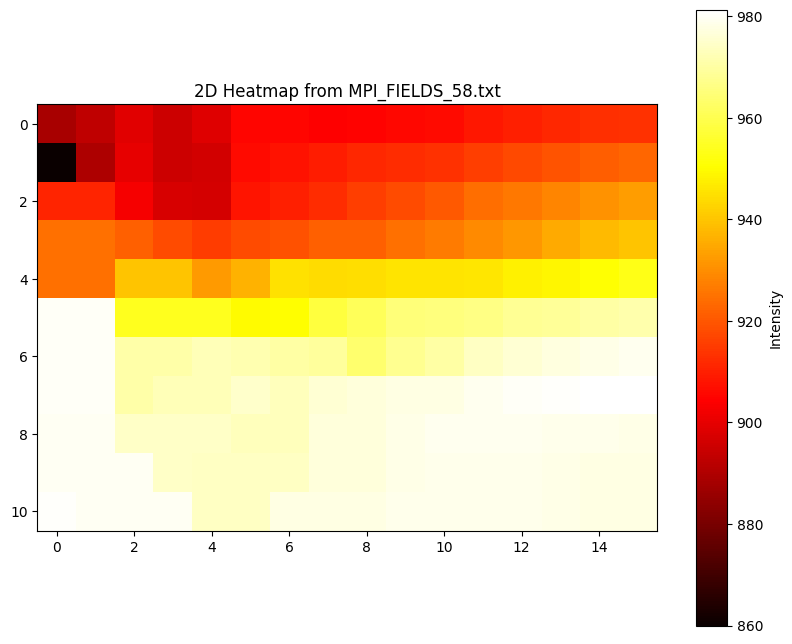

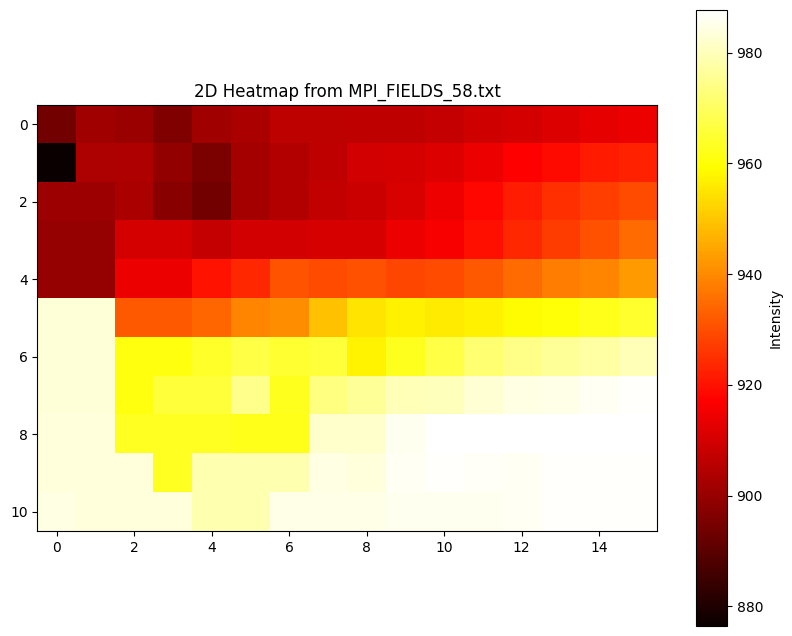

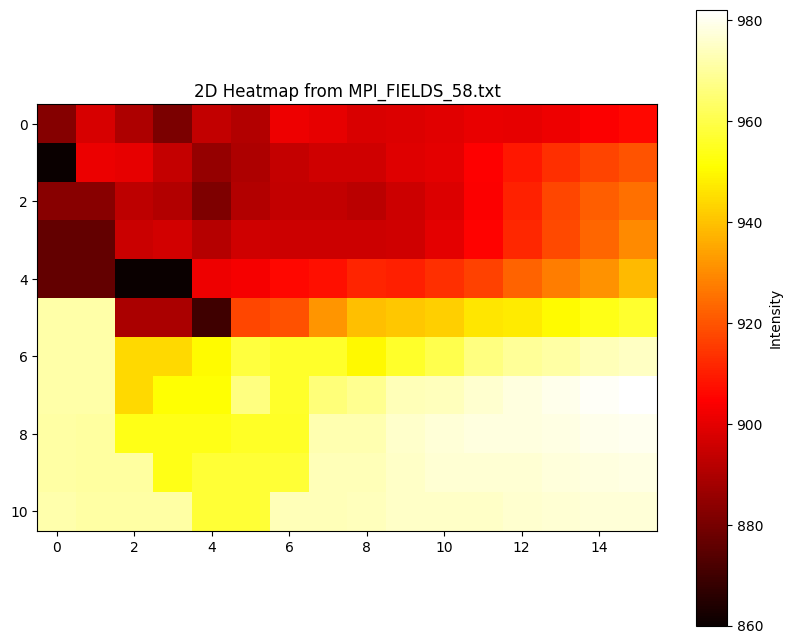

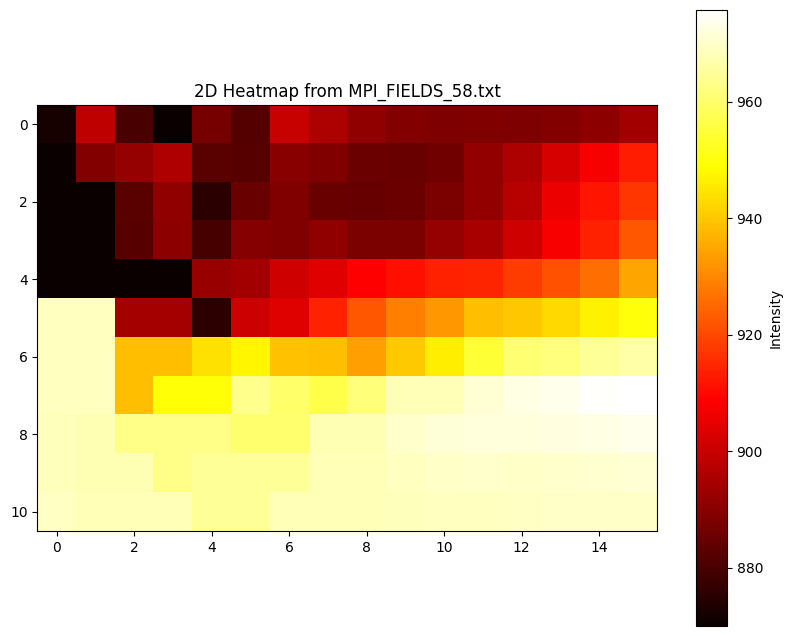

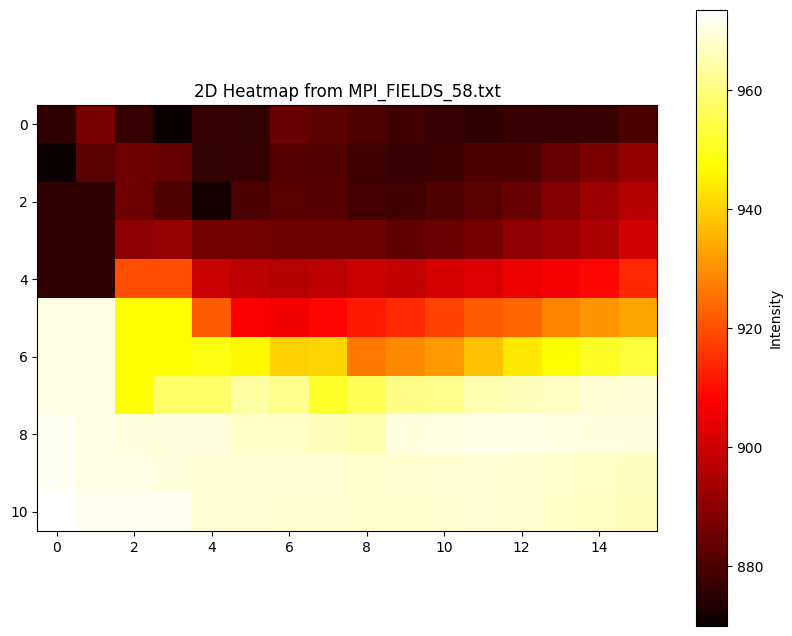

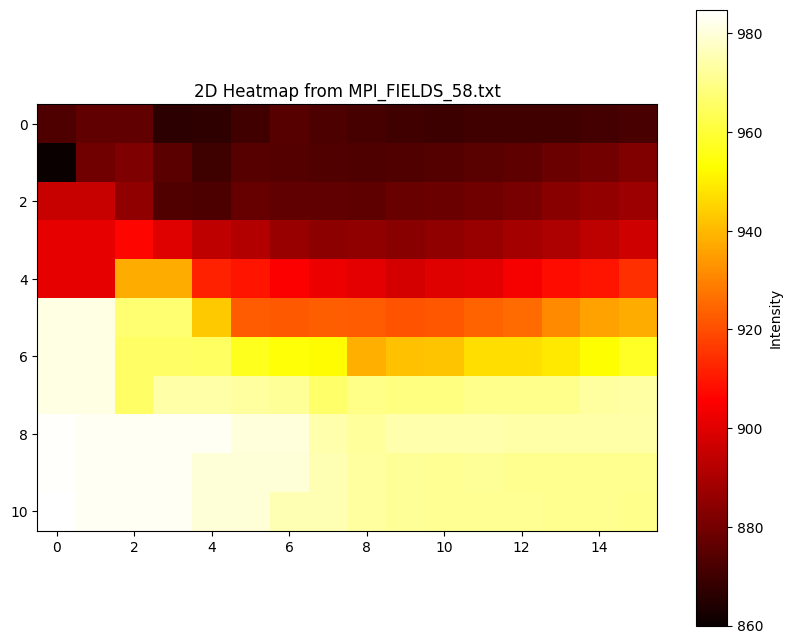

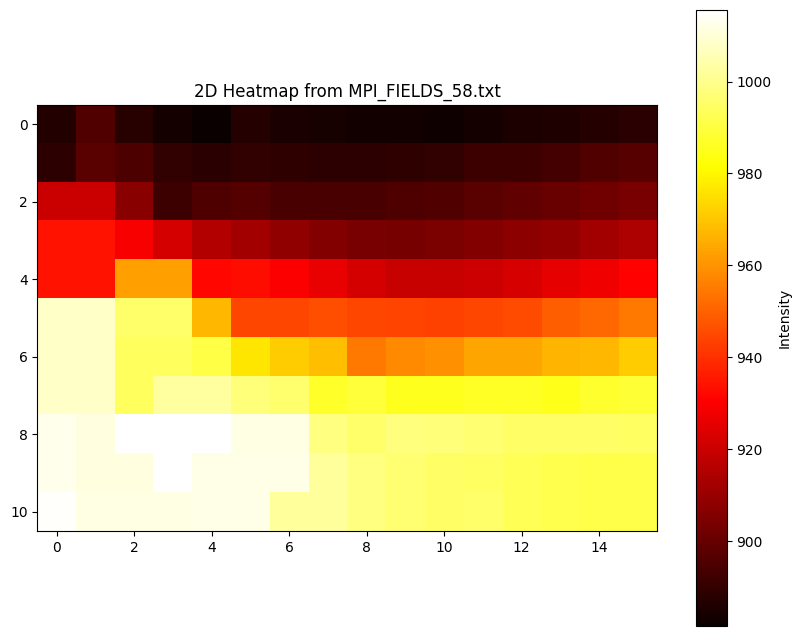

In [82]:
# The file appears to contain a list of numbers, likely representing data points for a 2D heatmap.
# I will process the data and create a 2D heatmap from it.

import numpy as np
import matplotlib.pyplot as plt

# 現在のファイルのディレクトリパスを取得
current_dir = os.getcwd()
# input_data ディレクトリへの相対パスを作成
input_dir = os.path.join(current_dir, '..', 'output_data')

coeff = np.load(os.path.join(input_dir,'COEFFICIENTS_JM_PRESSURE.npy'), allow_pickle=True).item()
coeff = coeff[5]
for month in range(5, 12):
    mpi = []
    for grid in coeff[month]:
        mpi.append(grid[6])

    mpi = np.array(mpi)
    mpi = mpi.reshape(11, 16)
    # 配列の行を上下反転させる
    mpi = np.flipud(mpi)
    
    # Plotting the 2D heatmap
    plt.figure(figsize=(10, 8))
    plt.imshow(mpi, cmap='hot', interpolation='nearest')
    plt.colorbar(label='Intensity')
    plt.title('2D Heatmap from MPI_FIELDS_58.txt')
    plt.show()